<a href="https://colab.research.google.com/github/LorenzoDonatti/Data_Mining_Covid-19_RS/blob/main/TrabalhoFinal_Minera%C3%A7%C3%A3oDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MINERAÇÃO DE DADOS***

---

*TRABALHO FINAL*

> ALUNO: LORENZO MOREIRA DONATTI

In [ ]:
import pandas as pd
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from functools import reduce

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn import preprocessing
from sklearn import utils

!pip install dtreeviz
import dtreeviz

In [ ]:
df = pd.read_csv("saudeRS_2022.csv", sep=';')
display(df)

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_INCLUSAO,...,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,15 a 19,RT-PCR,03/09/2020,25/08/2020,06/03/2022,...,NaN,08/09/2020,BRANCA,NAO ENCONTRADO,NAO,SANTA MONICA,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,TESTE RÁPIDO,08/02/2021,14/12/2020,11/02/2021,...,NaN,28/12/2020,BRANCA,NAO ENCONTRADO,NAO,COLONIA NOVA,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,RT-PCR,09/12/2020,06/12/2020,22/12/2020,...,NaN,20/12/2020,BRANCA,NAO ENCONTRADO,NAO,RURAL,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,70 a 79,RT-PCR,21/12/2020,16/12/2020,29/12/2020,...,NaN,30/12/2020,BRANCA,NAO ENCONTRADO,NAO,RURAL,NAO,E-SUS,BRASIL,NAO
4,430003,ACEGUÁ,16,BAGE - R22,Masculino,50 a 59,TESTE RÁPIDO,22/12/2020,04/12/2020,29/12/2020,...,NaN,18/12/2020,BRANCA,NAO ENCONTRADO,NAO,COLONIA NOVA,NAO,E-SUS,BRASIL,NAO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513605,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,30 a 39,RT-PCR,21/10/2020,21/10/2020,15/01/2021,...,NaN,04/11/2020,NAO INFORMADO,NAO ENCONTRADO,NAO,SAO MARCOS,NAO,E-SUS,BRASIL,NAO
513606,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,40 a 49,TESTE RÁPIDO,22/12/2020,08/12/2020,14/01/2021,...,NaN,22/12/2020,NAO INFORMADO,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
513607,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,20 a 29,RT-PCR,27/11/2020,21/11/2020,22/01/2021,...,NaN,05/12/2020,NAO INFORMADO,NAO ENCONTRADO,NAO,RAINHA DO MAR,NAO,E-SUS,BRASIL,NAO
513608,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,20 a 29,RT-PCR,25/11/2020,16/11/2020,20/01/2021,...,NaN,30/11/2020,NAO INFORMADO,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO


In [ ]:
df.isna().sum()

COD_IBGE                       0
MUNICIPIO                      0
COD_REGIAO_COVID               0
REGIAO_COVID                   0
SEXO                           0
FAIXAETARIA                    0
CRITERIO                       0
DATA_CONFIRMACAO               0
DATA_SINTOMAS                  0
DATA_INCLUSAO                  0
DATA_EVOLUCAO             479401
EVOLUCAO                       0
HOSPITALIZADO                  0
FEBRE                         20
TOSSE                         20
GARGANTA                      20
DISPNEIA                    6027
OUTROS                        20
CONDICOES                 439289
GESTANTE                       0
DATA_INCLUSAO_OBITO       503067
DATA_EVOLUCAO_ESTIMADA     32482
RACA_COR                       0
ETNIA_INDIGENA             15956
PROFISSIONAL_SAUDE             0
BAIRRO                        71
SRAG                           0
FONTE_INFORMACAO              14
PAIS_NASCIMENTO            16304
PES_PRIV_LIBERDADE             0
dtype: int

In [ ]:
df.drop(columns=['COD_IBGE', 'COD_REGIAO_COVID', 'RACA_COR', 'ETNIA_INDIGENA', 'BAIRRO', 'FONTE_INFORMACAO',
                 'MUNICIPIO', 'REGIAO_COVID', 'DATA_INCLUSAO', 'DATA_CONFIRMACAO',	'DATA_SINTOMAS','DATA_EVOLUCAO',
                 'DATA_INCLUSAO_OBITO',	'DATA_EVOLUCAO_ESTIMADA', 'CRITERIO','GESTANTE', 'PES_PRIV_LIBERDADE','PROFISSIONAL_SAUDE',
                 'OUTROS','PAIS_NASCIMENTO', 'SEXO'], inplace=True)
df.reset_index(drop=True, inplace=True)
display(df)

,FAIXAETARIA,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,CONDICOES,SRAG
0,15 a 19,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NaN,NAO
1,20 a 29,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NaN,NAO
2,40 a 49,RECUPERADO,NAO,NAO,SIM,NAO,SIM,NaN,NAO
3,70 a 79,RECUPERADO,NAO,SIM,SIM,SIM,NAO,Doenças cardíacas crônicas,NAO
4,50 a 59,RECUPERADO,NAO,NAO,SIM,NAO,NAO,NaN,NAO
...,...,...,...,...,...,...,...,...,...
513605,30 a 39,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NaN,NAO
513606,40 a 49,RECUPERADO,NAO,NAO,SIM,SIM,NAO,NaN,NAO
513607,20 a 29,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NaN,NAO
513608,20 a 29,RECUPERADO,NAO,SIM,NAO,NAO,NAO,NaN,NAO


In [ ]:
df.replace({'NAO': False, 'SIM': True}, inplace=True)

df['EVOLUCAO'].unique()

array(['RECUPERADO', 'OBITO', 'OBITO OUTRAS CAUSAS'], dtype=object)

In [ ]:
df_obito = df[df['EVOLUCAO'] == 'OBITO'].copy()
df_recup = df[df['EVOLUCAO'] == 'RECUPERADO'].copy()

df_obito.drop(columns='EVOLUCAO', inplace=True)
df_recup.drop(columns='EVOLUCAO', inplace=True)

In [ ]:
display(df_obito)

,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,CONDICOES,SRAG
68,80 e mais,True,True,True,False,True,Doença Cardiovascular Crônica,True
109,80 e mais,True,False,True,False,True,Doença Cardiovascular Crônica,True
141,80 e mais,True,False,True,False,True,Outros,True
163,50 a 59,True,True,True,True,True,"Doença Cardiovascular Crônica, Obesidade, Outros",True
168,70 a 79,True,True,True,False,True,Doença Cardiovascular Crônica,True
...,...,...,...,...,...,...,...,...
513449,40 a 49,True,False,True,False,True,NaN,True
513563,70 a 79,True,False,False,False,True,"Doença Cardiovascular Crônica, Diabetes mellitus",True
513574,70 a 79,True,True,True,True,True,Diabetes mellitus,True
513577,60 a 69,True,False,False,False,True,Diabetes mellitus,True


In [ ]:
df_obito['CONDICOES'].fillna('Nada', inplace=True)
df_recup['CONDICOES'].fillna('Nada', inplace=True)

df_obito['CONDICOES'] = df_obito['CONDICOES'].str.replace(" ", "").str.upper()
df_recup['CONDICOES'] = df_recup['CONDICOES'].str.replace(" ", "").str.upper()

lista_cond_obito = df_obito['CONDICOES'].tolist()
lista_idade_obito = df_obito['FAIXAETARIA'].tolist()

lista_cond_recup = df_recup['CONDICOES'].tolist()
lista_idade_recup = df_recup['FAIXAETARIA'].tolist()

for i in range(len(lista_cond_obito)):
  lista_cond_obito[i] = lista_cond_obito[i].split(',')
  lista_idade_obito[i] = lista_idade_obito[i].split(',')

for i in range(len(lista_cond_recup)):
  lista_cond_recup[i] = lista_cond_recup[i].split(',')
  lista_idade_recup[i] = lista_idade_recup[i].split(',')

df_obito.drop(columns=['CONDICOES', 'FAIXAETARIA'], inplace=True)
df_obito.fillna(False, inplace=True)

df_recup.drop(columns=['CONDICOES', 'FAIXAETARIA'], inplace=True)
df_recup.fillna(False, inplace=True)


In [ ]:
te = TransactionEncoder()

te_ary_cond_obito = te.fit(lista_cond_obito).transform(lista_cond_obito)
dft_cond_obito = pd.DataFrame(te_ary_cond_obito, columns=te.columns_)

te_ary_cond_recup = te.fit(lista_cond_recup).transform(lista_cond_recup)
dft_cond_recup = pd.DataFrame(te_ary_cond_recup, columns=te.columns_)

te_ary_idade_obito = te.fit(lista_idade_obito).transform(lista_idade_obito)
dft_idade_obito = pd.DataFrame(te_ary_idade_obito, columns=te.columns_)

te_ary_idade_recup = te.fit(lista_idade_recup).transform(lista_idade_recup)
dft_idade_recup = pd.DataFrame(te_ary_idade_recup, columns=te.columns_)

In [ ]:
df_obito.reset_index(drop=True, inplace=True)
df_recup.reset_index(drop=True, inplace=True)

dfs_obito = [df_obito, dft_cond_obito, dft_idade_obito]
dfs_recup = [df_recup, dft_cond_recup, dft_idade_recup]

df_final_obito = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs_obito)
df_final_recup = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs_recup)

In [ ]:
obito = apriori(df_final_obito, min_support = 0.2, use_colnames=True)
obito.sort_values(by=['support'],ascending=False)

,support,itemsets
4,1.000000,(SRAG)
0,0.966322,(HOSPITALIZADO)
14,0.966322,"(HOSPITALIZADO, SRAG)"
31,0.825633,"(DISPNEIA, SRAG)"
3,0.825633,(DISPNEIA)
...,...,...
88,0.215160,"(HOSPITALIZADO, DOENÇACARDIOVASCULARCRÔNICA, D..."
94,0.214496,"(HOSPITALIZADO, DIABETESMELLITUS, SRAG, TOSSE)"
51,0.214496,"(HOSPITALIZADO, DIABETESMELLITUS, TOSSE)"
66,0.213073,"(HOSPITALIZADO, DIABETESMELLITUS, DOENÇACARDIO..."


In [ ]:
obito_ = association_rules(obito, metric="confidence", min_threshold=0.8)
obito_[obito_['consequents'] == {'SRAG'}].sort_values(by=['support'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(HOSPITALIZADO),(SRAG),0.966322,1.0,0.966322,1.0,1.0,0.0,inf
16,(DISPNEIA),(SRAG),0.825633,1.0,0.825633,1.0,1.0,0.0,inf
47,"(HOSPITALIZADO, DISPNEIA)",(SRAG),0.804288,1.0,0.804288,1.0,1.0,0.0,inf
15,(TOSSE),(SRAG),0.608386,1.0,0.608386,1.0,1.0,0.0,inf
41,"(HOSPITALIZADO, TOSSE)",(SRAG),0.590646,1.0,0.590646,1.0,1.0,0.0,inf
13,(FEBRE),(SRAG),0.537994,1.0,0.537994,1.0,1.0,0.0,inf
33,"(HOSPITALIZADO, FEBRE)",(SRAG),0.522626,1.0,0.522626,1.0,1.0,0.0,inf
93,"(DISPNEIA, TOSSE)",(SRAG),0.520254,1.0,0.520254,1.0,1.0,0.0,inf
139,"(HOSPITALIZADO, DISPNEIA, TOSSE)",(SRAG),0.508775,1.0,0.508775,1.0,1.0,0.0,inf
24,(DOENÇACARDIOVASCULARCRÔNICA),(SRAG),0.497486,1.0,0.497486,1.0,1.0,0.0,inf


In [ ]:
display(obito_[obito_['antecedents'] == {'80 e mais'}].sort_values(by=['support'],ascending=False))
display(obito_[obito_['antecedents'] == {'70 a 79'}].sort_values(by=['support'],ascending=False))
display(obito_[obito_['antecedents'] == {'60 a 69'}].sort_values(by=['support'],ascending=False))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(80 e mais),(SRAG),0.289062,1.000000,0.289062,1.000000,1.000000,0.000000,inf
11,(80 e mais),(HOSPITALIZADO),0.289062,0.966322,0.276065,0.955038,0.988322,-0.003262,0.749029
83,(80 e mais),"(HOSPITALIZADO, SRAG)",0.289062,0.966322,0.276065,0.955038,0.988322,-0.003262,0.749029
22,(80 e mais),(DISPNEIA),0.289062,0.825633,0.231382,0.800459,0.969510,-0.007277,0.873841
115,(80 e mais),"(DISPNEIA, SRAG)",0.289062,0.825633,0.231382,0.800459,0.969510,-0.007277,0.873841


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(70 a 79),(SRAG),0.291149,1.000000,0.291149,1.000000,1.000000,0.000000,inf
10,(70 a 79),(HOSPITALIZADO),0.291149,0.966322,0.284129,0.975888,1.009899,0.002785,1.396728
80,(70 a 79),"(HOSPITALIZADO, SRAG)",0.291149,0.966322,0.284129,0.975888,1.009899,0.002785,1.396728
21,(70 a 79),(DISPNEIA),0.291149,0.825633,0.240964,0.827631,1.002420,0.000582,1.011591
112,(70 a 79),"(DISPNEIA, SRAG)",0.291149,0.825633,0.240964,0.827631,1.002420,0.000582,1.011591
63,(70 a 79),"(HOSPITALIZADO, DISPNEIA)",0.291149,0.804288,0.236885,0.813620,1.011603,0.002717,1.050070
186,(70 a 79),"(HOSPITALIZADO, DISPNEIA, SRAG)",0.291149,0.804288,0.236885,0.813620,1.011603,0.002717,1.050070


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(60 a 69),(SRAG),0.230623,1.000000,0.230623,1.000000,1.00000,0.000000,inf
9,(60 a 69),(HOSPITALIZADO),0.230623,0.966322,0.224931,0.975319,1.00931,0.002075,1.364521
77,(60 a 69),"(HOSPITALIZADO, SRAG)",0.230623,0.966322,0.224931,0.975319,1.00931,0.002075,1.364521


In [ ]:
recup = apriori(df_final_recup, min_support = 0.01, use_colnames=True)
recup.sort_values(by=['support'],ascending=False)

,support,itemsets
11,0.871215,(NADA)
2,0.428634,(TOSSE)
55,0.346673,"(NADA, TOSSE)"
1,0.319920,(FEBRE)
3,0.304594,(GARGANTA)
...,...,...
33,0.010111,"(HOSPITALIZADO, 50 a 59)"
120,0.010111,"(HOSPITALIZADO, SRAG, 50 a 59)"
237,0.010097,"(NADA, 20 a 29, DISPNEIA, GARGANTA)"
223,0.010056,"(NADA, 20 a 29, DISPNEIA, FEBRE)"


In [ ]:
recup_ = association_rules(recup, metric="confidence", min_threshold=0.5)
recup_[recup_['consequents'] == {'SRAG'}].sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(HOSPITALIZADO),(SRAG),0.048015,0.048071,0.048015,1.000000,20.802605,0.045707,inf
89,"(HOSPITALIZADO, 60 a 69)",(SRAG),0.010680,0.048071,0.010680,1.000000,20.802605,0.010166,inf
234,"(HOSPITALIZADO, DISPNEIA, OUTROS)",(SRAG),0.010527,0.048071,0.010527,1.000000,20.802605,0.010021,inf
229,"(HOSPITALIZADO, NADA, DISPNEIA)",(SRAG),0.010865,0.048071,0.010865,1.000000,20.802605,0.010342,inf
222,"(HOSPITALIZADO, DOENÇACARDIOVASCULARCRÔNICA, D...",(SRAG),0.012221,0.048071,0.012221,1.000000,20.802605,0.011633,inf
218,"(HOSPITALIZADO, NADA, TOSSE)",(SRAG),0.011380,0.048071,0.011380,1.000000,20.802605,0.010833,inf
211,"(HOSPITALIZADO, DOENÇACARDIOVASCULARCRÔNICA, T...",(SRAG),0.011197,0.048071,0.011197,1.000000,20.802605,0.010658,inf
200,"(HOSPITALIZADO, DISPNEIA, TOSSE)",(SRAG),0.026598,0.048071,0.026598,1.000000,20.802605,0.025319,inf
194,"(HOSPITALIZADO, NADA, FEBRE)",(SRAG),0.010322,0.048071,0.010322,1.000000,20.802605,0.009826,inf
188,"(HOSPITALIZADO, DISPNEIA, FEBRE)",(SRAG),0.021968,0.048071,0.021968,1.000000,20.802605,0.020912,inf


In [ ]:
recup_[recup_['consequents'] == {'HOSPITALIZADO'}].sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
85,"(SRAG, OUTROS)",(HOSPITALIZADO),0.014123,0.048015,0.014117,0.999578,20.817927,0.013439,2254.299920
212,"(DOENÇACARDIOVASCULARCRÔNICA, SRAG, TOSSE)",(HOSPITALIZADO),0.011203,0.048015,0.011197,0.999468,20.815635,0.010659,1788.144714
236,"(DISPNEIA, SRAG, OUTROS)",(HOSPITALIZADO),0.010533,0.048015,0.010527,0.999434,20.814929,0.010021,1681.205093
74,"(DISPNEIA, OUTROS)",(HOSPITALIZADO),0.010535,0.048015,0.010527,0.999245,20.811001,0.010021,1261.141816
332,"(SRAG, DISPNEIA, FEBRE, TOSSE)",(HOSPITALIZADO),0.017702,0.048015,0.017688,0.999214,20.810349,0.016838,1210.924619
70,"(DOENÇACARDIOVASCULARCRÔNICA, DISPNEIA)",(HOSPITALIZADO),0.012230,0.048015,0.012221,0.999187,20.809796,0.011633,1171.322053
224,"(DOENÇACARDIOVASCULARCRÔNICA, DISPNEIA, SRAG)",(HOSPITALIZADO),0.012230,0.048015,0.012221,0.999187,20.809796,0.011633,1171.322053
80,"(DOENÇACARDIOVASCULARCRÔNICA, SRAG)",(HOSPITALIZADO),0.016008,0.048015,0.015994,0.999131,20.808617,0.015225,1095.054474
189,"(DISPNEIA, SRAG, FEBRE)",(HOSPITALIZADO),0.021988,0.048015,0.021968,0.999096,20.807892,0.020912,1052.895149
48,"(SRAG, FEBRE)",(HOSPITALIZADO),0.029666,0.048015,0.029638,0.999062,20.807183,0.028213,1014.679760


In [ ]:
display(recup_[recup_['antecedents'] == {'50 a 59'}].sort_values(by=['support'],ascending=False))
display(recup_[recup_['antecedents'] == {'40 a 49'}].sort_values(by=['support'],ascending=False))
display(recup_[recup_['antecedents'] == {'30 a 39'}].sort_values(by=['support'],ascending=False))
display(recup_[recup_['antecedents'] == {'20 a 29'}].sort_values(by=['support'],ascending=False))
display(recup_[recup_['antecedents'] == {'15 a 19'}].sort_values(by=['support'],ascending=False))
display(recup_[recup_['antecedents'] == {'10 a 14'}].sort_values(by=['support'],ascending=False))
display(recup_[recup_['antecedents'] == {'05 a 09'}].sort_values(by=['support'],ascending=False))
display(recup_[recup_['antecedents'] == {'01 a 04'}].sort_values(by=['support'],ascending=False))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,(50 a 59),(NADA),0.151352,0.871215,0.123175,0.813834,0.934137,-0.008685,0.691778


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,(40 a 49),(NADA),0.190737,0.871215,0.170194,0.8923,1.024202,0.004022,1.195774


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(30 a 39),(NADA),0.227931,0.871215,0.212993,0.934462,1.072597,0.014416,1.96505


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(20 a 29),(NADA),0.185646,0.871215,0.175878,0.947388,1.087433,0.014141,2.447815


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,(15 a 19),(NADA),0.034896,0.871215,0.033037,0.946733,1.086682,0.002635,2.417724


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(10 a 14),(NADA),0.01794,0.871215,0.017071,0.951574,1.092238,0.001442,2.659406


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,(05 a 09),(NADA),0.015586,0.871215,0.014908,0.956505,1.097898,0.001329,2.960933


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(01 a 04),(NADA),0.014127,0.871215,0.013652,0.966366,1.109218,0.001344,3.829078


In [ ]:
df['CONDICOES'].fillna('Nada', inplace=True)

lista_cond= df['CONDICOES'].tolist()
lista_idade= df['FAIXAETARIA'].tolist()

for i in range(len(lista_cond)):
  lista_cond[i] = lista_cond[i].split(',')
  lista_idade[i] = lista_idade[i].split(',')

df.drop(columns=['CONDICOES', 'FAIXAETARIA'], inplace=True)
df.fillna(False, inplace=True)

In [ ]:
te = TransactionEncoder()
te_ary_cond = te.fit(lista_cond).transform(lista_cond)
dft_cond = pd.DataFrame(te_ary_cond, columns=te.columns_)

te_ary_idade = te.fit(lista_idade).transform(lista_idade)
dft_idade = pd.DataFrame(te_ary_idade, columns=te.columns_)

In [ ]:
df.reset_index(drop=True, inplace=True)

dfs = [df, dft_cond, dft_idade]

df_final = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs)

In [ ]:
print(df_final['EVOLUCAO'].unique())

df_final.replace({'RECUPERADO': False, 'OBITO': True, 'OBITO OUTRAS CAUSAS': np.nan}, inplace=True)
df_final.dropna(inplace=True)

['RECUPERADO' 'OBITO' 'OBITO OUTRAS CAUSAS']


In [ ]:
lab = preprocessing.LabelEncoder()
y_transf = lab.fit_transform(df_final['EVOLUCAO'])

print(y_transf.shape)

(513548,)


In [ ]:
X = df_final.drop(columns='EVOLUCAO')
y = y_transf

clf = DecisionTreeClassifier(max_depth=6, random_state=1234)
model = clf.fit(X, y)

In [ ]:
arvore = tree.export_text(clf,feature_names=df_final.drop(columns='EVOLUCAO').columns.to_list(),show_weights=True)
print(arvore)

|--- SRAG <= 0.50
|   |--- weights: [478827.00, 0.00] class: 0
|--- SRAG >  0.50
|   |--- 80 e mais <= 0.50
|   |   |--- 70 a 79 <= 0.50
|   |   |   |--- 60 a 69 <= 0.50
|   |   |   |   |--- Nada <= 0.50
|   |   |   |   |   |--- HOSPITALIZADO <= 0.50
|   |   |   |   |   |   |--- weights: [8.00, 61.00] class: 1
|   |   |   |   |   |--- HOSPITALIZADO >  0.50
|   |   |   |   |   |   |--- weights: [7218.00, 1633.00] class: 0
|   |   |   |   |--- Nada >  0.50
|   |   |   |   |   |--- HOSPITALIZADO <= 0.50
|   |   |   |   |   |   |--- weights: [9.00, 23.00] class: 1
|   |   |   |   |   |--- HOSPITALIZADO >  0.50
|   |   |   |   |   |   |--- weights: [5513.00, 277.00] class: 0
|   |   |   |--- 60 a 69 >  0.50
|   |   |   |   |--- Nada <= 0.50
|   |   |   |   |   |--- HOSPITALIZADO <= 0.50
|   |   |   |   |   |   |--- weights: [5.00, 46.00] class: 1
|   |   |   |   |   |--- HOSPITALIZADO >  0.50
|   |   |   |   |   |   |--- weights: [4174.00, 2128.00] class: 0
|   |   |   |   |--- Nada >  0.50

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
<__array_function__ internals>:5: R

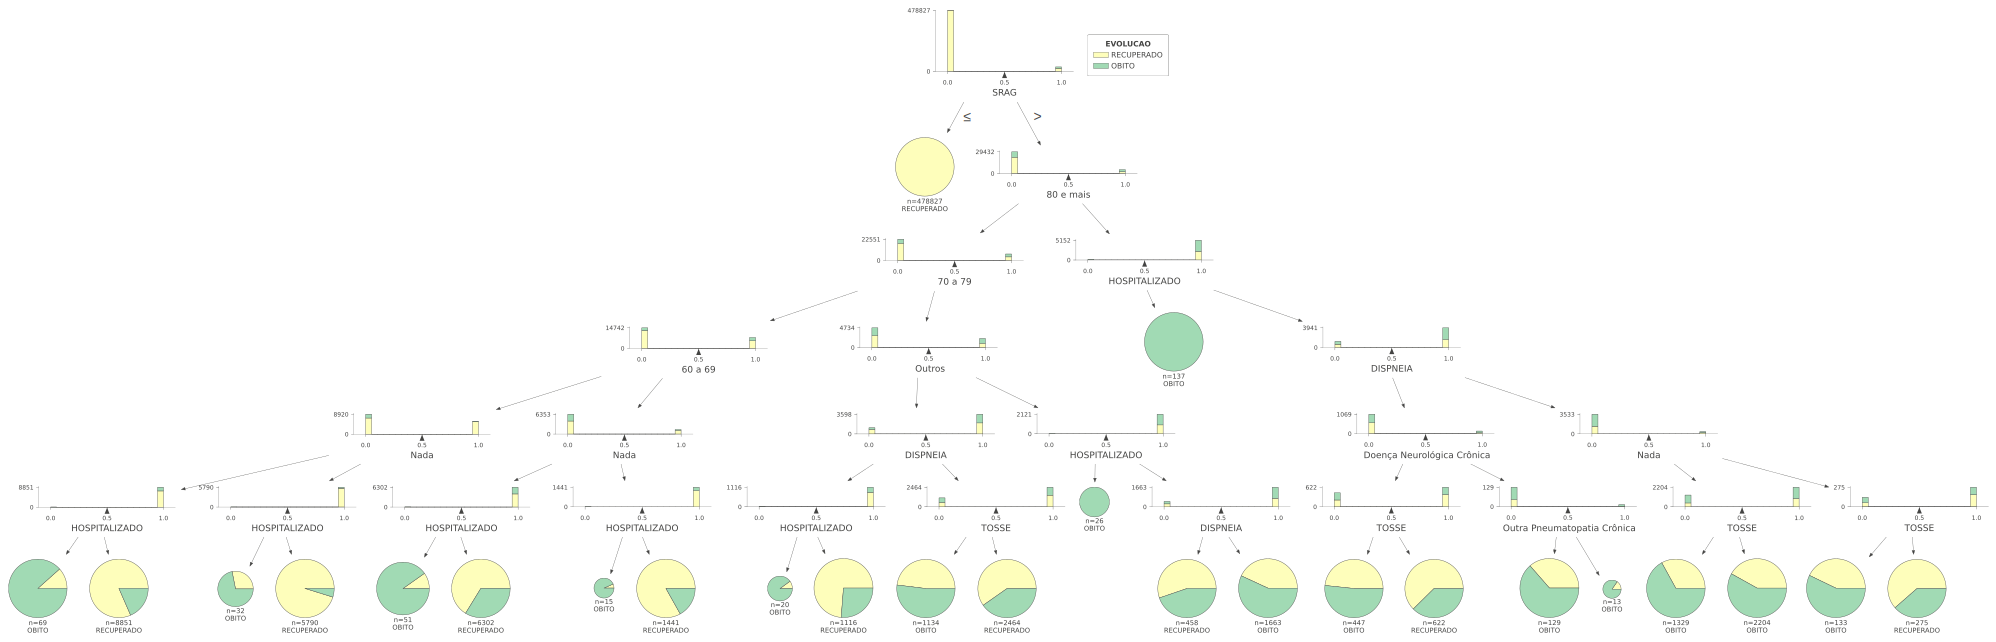

In [ ]:
viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=df_final.drop(columns='EVOLUCAO').columns.to_list(),
                           target_name='EVOLUCAO',
                           class_names=['RECUPERADO','OBITO'])

viz_model.view()     # render as SVG into internal object